<a href="https://colab.research.google.com/github/nspiro-hub/data-analysis-portfolio/blob/main/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```



# Part 1: Setup and Load Data

In [13]:
#Step 1: import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Step 2: load titanic dataset from seaborn
df=sns.load_dataset('titanic')

#Step 3: display first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True




```
# This is formatted as code
```

# Part 2: Clean & Inspect Data

In [14]:
#Step 4: general info
df.info()

#Step 5: check for missing values
df.isnull().sum()

#Step 6: Drop columns with too many nulls or irrelevant info
df_clean = df.drop(columns=['deck', 'embark_town', 'alive', 'adult_male',])

#Drop rows where age or embarkation port is missing (if needed)
df_clean = df_clean.dropna(subset=['age','embarked'])

df_clean.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True


# Part 3: Analyze Survival by Gender

sex
female    0.752896
male      0.205298
Name: survived, dtype: float64


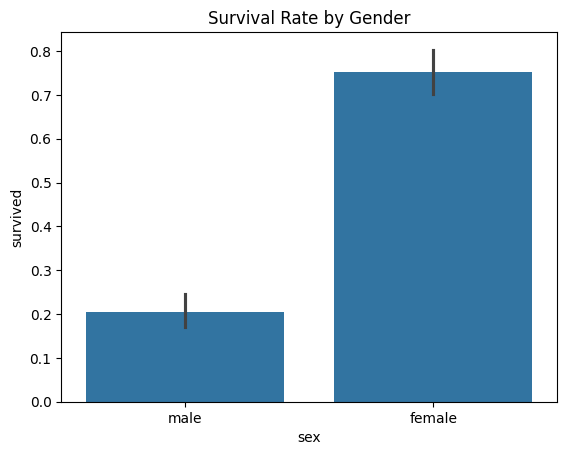

In [15]:
#Survival rate by gender
survival_by_sex = df_clean.groupby('sex')['survived'].mean()
print(survival_by_sex)

sns.barplot(x='sex', y='survived', data = df_clean)
plt.title('Survival Rate by Gender')
plt.show()

# Part 4: Analyze Survival by Passenger Class

pclass
1    0.652174
2    0.479769
3    0.239437
Name: survived, dtype: float64


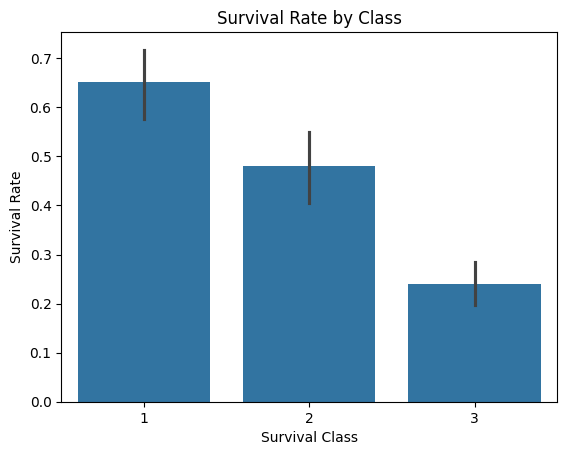

In [16]:
#Survival rate by passenger class
survival_by_passenger_class = df_clean.groupby('pclass')['survived'].mean()
print(survival_by_passenger_class)

#Bar Plot
sns.barplot(x='pclass', y='survived', data =df_clean)
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.xlabel('Survival Class')
plt.show()



```
# This is formatted as code
```

# Part 5: Analyze Survival by Age Group

<ipython-input-17-3820262019>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df_clean.groupby('age_group')['survived'].mean()


age_group
Child          0.579710
Teen           0.428571
Young Adult    0.382682
Adult          0.396907
Senior         0.190476
Name: survived, dtype: float64


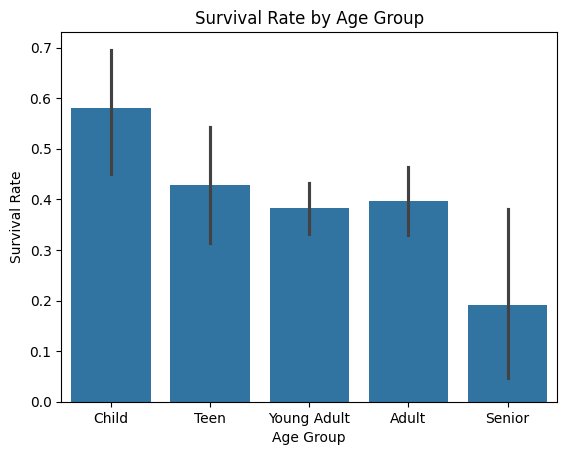

In [17]:
#Create age bins
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels)

#survival rate by age group
survival_by_age = df_clean.groupby('age_group')['survived'].mean()
print(survival_by_age)

#Bar plot
sns.barplot(x='age_group', y='survived', data = df_clean)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

# Part 6: Additional Visualizations

# Statistical Analysis

In [18]:
#Which groups had higher/lower survival rates?
#Add group counts
grouped = df_clean.groupby(['sex','pclass', 'age_group'])\
.agg(survival_rate=('survived','mean'), count = ('survived','count'))\
.reset_index()

#filter groups with reasonable sample sizes
filtered = grouped[grouped['count']>10]
print(filtered)

       sex  pclass    age_group  survival_rate  count
2   female       1  Young Adult       0.972222     36
3   female       1        Adult       0.971429     35
7   female       2  Young Adult       0.925000     40
8   female       2        Adult       0.850000     20
10  female       3        Child       0.478261     23
11  female       3         Teen       0.550000     20
12  female       3  Young Adult       0.500000     44
13  female       3        Adult       0.142857     14
17    male       1  Young Adult       0.500000     30
18    male       1        Adult       0.370370     54
19    male       1       Senior       0.083333     12
22    male       2  Young Adult       0.074074     54
23    male       2        Adult       0.037037     27
25    male       3        Child       0.360000     25
26    male       3         Teen       0.076923     26
27    male       3  Young Adult       0.155844    154
28    male       3        Adult       0.068182     44


<ipython-input-18-3447165074>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_clean.groupby(['sex','pclass', 'age_group'])\


In [19]:
#Confidence Intervals: here we use a 95% CI and Wilson score int. to find "true" survival rate range for each group
from statsmodels.stats.proportion import proportion_confint

#Drop rows with NaN in survival_rate or count
grouped_clean = grouped.dropna(subset=['survival_rate', 'count'])
grouped_clean = grouped_clean[grouped_clean['count']>=10].copy()
#Apply confidense interval calculation
grouped_clean['lower'], grouped_clean['upper'] = zip(*grouped_clean.apply(
    lambda row: proportion_confint(
        count=int(row['survival_rate'] * row['count']),
        nobs=int(row['count']),
        method='wilson'
    ),
    axis = 1
))

In [9]:
#chi-square test: see if survival and gender are statistically dependent
#if p-value<0.05 then statistically significant relationship

from scipy.stats import chi2_contingency

#contingency table: survival count by gender
contingency = pd.crosstab(df_clean['sex'],df_clean['survived'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic for sex: {chi2}, p-value: {p}")

#contingency table: survival count by class
contingency = pd.crosstab(df_clean['pclass'],df_clean['survived'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic for class: {chi2}, p-value: {p}")

#contingency table: survival count by age group
contingency = pd.crosstab(df_clean['age_group'], df_clean['survived'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic for sex: 202.86944877617123, p-value: 4.939416685451492e-46
Chi-square statistic for class: 91.08074548791019, p-value: 1.6675060315554636e-20
Chi-square statistic: 13.709396811204813, p-value: 0.008282697903966723


In [20]:
#Logistic Regression, quantify how much each factor affects survival

import statsmodels.api as sm

#convert categorical variables to numeric dummy variables
df_encoded = pd.get_dummies(df_clean[['sex', 'pclass', 'age_group']], drop_first=True)

#ensure data types are numeric
X = sm.add_constant(df_encoded.astype(float))
y = df_clean['survived'].astype(float)

#Fit Logistic regression model
model = sm.Logit(y,X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450946
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Sun, 15 Jun 2025   Pseudo R-squ.:                  0.3317
Time:                        19:39:35   Log-Likelihood:                -321.07
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 7.803e-66
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.1703      0.517     10.006      0.000       4.157       6.

#Visualization of Statistics

In [22]:
#Summary Table for Confidence intervals

summary_table = grouped_clean.rename(columns={
    'sex': 'Sex',
    'pclass': 'Class',
    'age_group': 'Age Group',
    'count': 'Count',
    'survival_rate': 'Survival Rate',
    'lower': 'CI Lower',
    'upper': 'CI Upper'
})

#Add CO string column
summary_table['95% CI'] = summary_table.apply(
    lambda row: f"{row['CI Lower']:.2f}-{row['CI Upper']:.2f}", axis=1
)

#Final format
final_table = summary_table[['Sex', 'Class', 'Age Group', 'Count', 'Survival Rate', '95% CI']]

#Sort by survival rate from highest to lowest
final_table = final_table.sort_values(by='Survival Rate', ascending = False).reset_index(drop=True)

print(final_table)

       Sex  Class    Age Group  Count  Survival Rate     95% CI
0   female      1         Teen     10       1.000000  0.72-1.00
1   female      1  Young Adult     36       0.972222  0.86-1.00
2   female      1        Adult     35       0.971429  0.85-0.99
3   female      2  Young Adult     40       0.925000  0.80-0.97
4   female      2        Adult     20       0.850000  0.64-0.95
5   female      3         Teen     20       0.550000  0.34-0.74
6     male      1  Young Adult     30       0.500000  0.33-0.67
7   female      3  Young Adult     44       0.500000  0.36-0.64
8   female      3        Child     23       0.478261  0.29-0.67
9     male      1        Adult     54       0.370370  0.25-0.50
10    male      3        Child     25       0.360000  0.20-0.55
11    male      3  Young Adult    154       0.155844  0.11-0.22
12  female      3        Adult     14       0.142857  0.04-0.40
13    male      1       Senior     12       0.083333  0.01-0.35
14    male      3         Teen     26   